In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


UNIVARIATE ANALYSIS

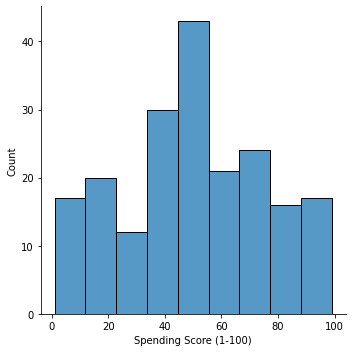

In [4]:
sns.displot(df["Spending Score (1-100)"])

BIVARIATE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


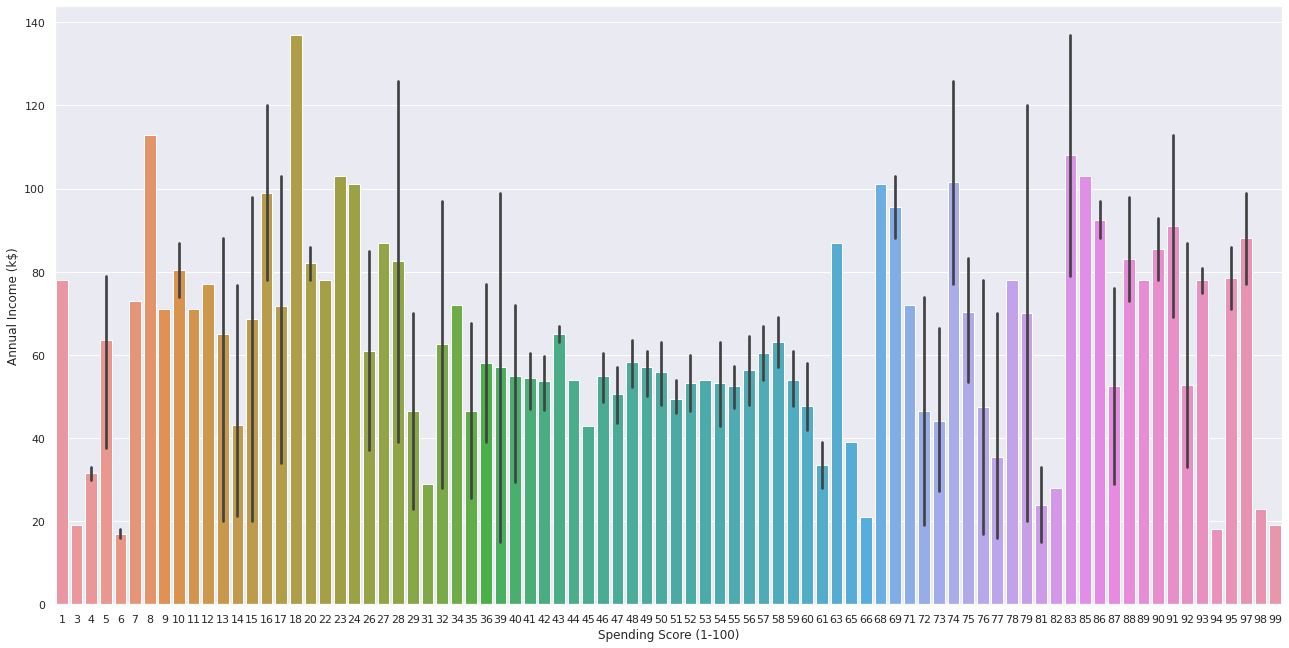

In [5]:
sns.set(rc={'figure.figsize':(22,11)})
sns.barplot(df["Spending Score (1-100)"],df["Annual Income (k$)"])

MULTIVARIATE ANALYSIS

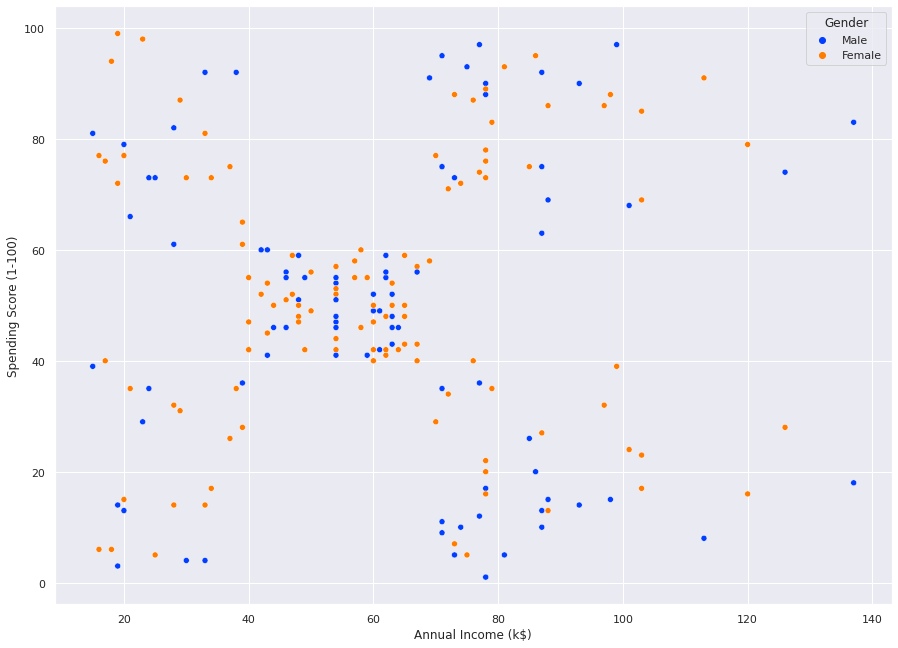

In [6]:
sns.set(rc={'figure.figsize':(15,11)})
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df,palette='bright',hue='Gender');

DESCRIPTIVE STATISTICS

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [9]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [10]:
df.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [11]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [12]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

HANDLING MISSING VALUES

In [13]:
df.isnull().sum()  #no missing values found

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

FINDING OUTLIERS AND REPLACING THEM

In [14]:
sorted(df["Annual Income (k$)"])

[15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 21,
 21,
 23,
 23,
 24,
 24,
 25,
 25,
 28,
 28,
 28,
 28,
 29,
 29,
 30,
 30,
 33,
 33,
 33,
 33,
 34,
 34,
 37,
 37,
 38,
 38,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 42,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 46,
 46,
 46,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 50,
 50,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 57,
 57,
 58,
 58,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 65,
 65,
 65,
 65,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 71,
 71,
 71,
 71,
 71,
 71,
 72,
 72,
 73,
 73,
 73,
 73,
 74,
 74,
 75,
 75,
 76,
 76,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 79,
 79,
 81,
 81,
 85,
 85,
 86,
 86,
 87,
 87,
 87,
 87,
 87,
 87,
 88,
 88,
 88,
 88,
 93,
 93,
 97,
 97,
 98,
 98,
 99,
 99,
 101,
 101,
 103,
 103,
 103,
 103,
 113,
 113,
 120,
 120,
 126,
 126

In [15]:
quantile1,quantile3=np.percentile(df["Annual Income (k$)"],[25,75])

In [16]:
print(quantile1,quantile3)

41.5 78.0


In [17]:
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)
print(lower_bound,upper_bound)

-13.25 132.75


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


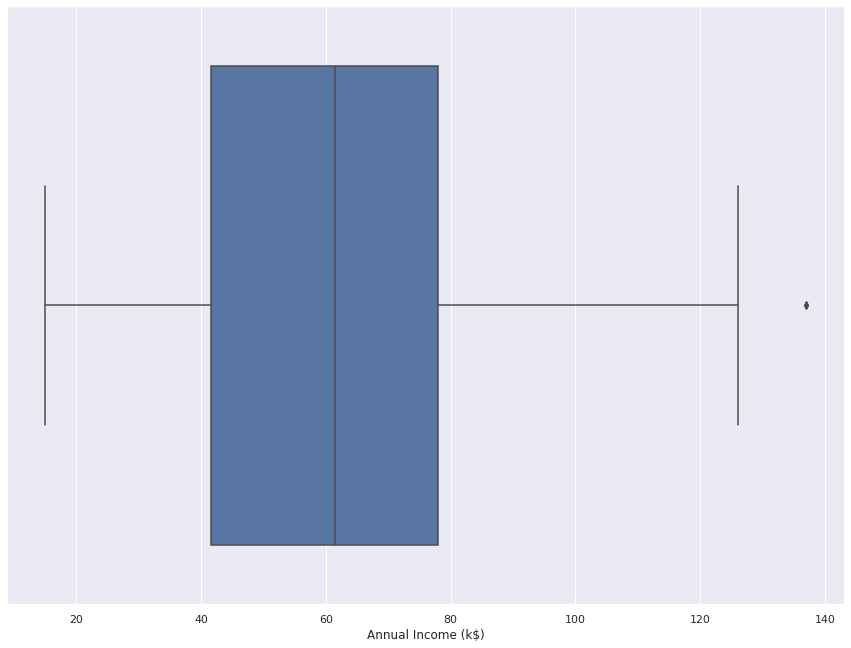

In [18]:
sns.set(rc={'figure.figsize':(15,11)})
sns.boxplot(df["Annual Income (k$)"])

CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [19]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [20]:
df["Gender"].replace({"Female":0,"Male":1},inplace = True)

In [21]:
df.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,0,34,103,23
191,192,0,32,103,69
192,193,1,33,113,8
193,194,0,38,113,91
194,195,0,47,120,16
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


SCALING THE DATA

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)

In [23]:
df_scaled.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


CLUSTERING

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[166.5          0.45588235  36.04411765  88.91176471  50.20588235]
 [ 31.5          0.40322581  37.4516129   30.61290323  49.83870968]
 [ 97.5          0.45714286  42.81428571  59.54285714  50.51428571]]


SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [29]:
x= df.iloc[:,:-1].values
y= df.iloc[:,3].values

In [30]:
x

array([[  1,   1,  19,  15],
       [  2,   1,  21,  15],
       [  3,   0,  20,  16],
       [  4,   0,  23,  16],
       [  5,   0,  31,  17],
       [  6,   0,  22,  17],
       [  7,   0,  35,  18],
       [  8,   0,  23,  18],
       [  9,   1,  64,  19],
       [ 10,   0,  30,  19],
       [ 11,   1,  67,  19],
       [ 12,   0,  35,  19],
       [ 13,   0,  58,  20],
       [ 14,   0,  24,  20],
       [ 15,   1,  37,  20],
       [ 16,   1,  22,  20],
       [ 17,   0,  35,  21],
       [ 18,   1,  20,  21],
       [ 19,   1,  52,  23],
       [ 20,   0,  35,  23],
       [ 21,   1,  35,  24],
       [ 22,   1,  25,  24],
       [ 23,   0,  46,  25],
       [ 24,   1,  31,  25],
       [ 25,   0,  54,  28],
       [ 26,   1,  29,  28],
       [ 27,   0,  45,  28],
       [ 28,   1,  35,  28],
       [ 29,   0,  40,  29],
       [ 30,   0,  23,  29],
       [ 31,   1,  60,  30],
       [ 32,   0,  21,  30],
       [ 33,   1,  53,  33],
       [ 34,   1,  18,  33],
       [ 35,  

In [31]:
y

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

SPLIT DATA INTO TRAINING AND TESTING

In [32]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x, y = make_blobs(n_samples=1000)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 2) (300, 2) (700,) (300,)


BUILDING A MODEL, TRAINING, TESTING AND ACCURACY

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
pred = knn.predict(x_test)

In [36]:
pred

array([1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1,
       1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score",accuracy_score(y_test,pred))

Accuracy score 0.9833333333333333


In [38]:
confusion_matrix(y_test,pred)

array([[106,   0,   0],
       [  0,  90,   2],
       [  0,   3,  99]])